In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist  # 28x28 images of hand-written digit 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# build the model
model = tf.keras.models.Sequential()

# input layer
model.add(tf.keras.layers.Flatten())

# hidden layer x 2
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# final layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# define parametres for training of the model
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, epochs=3)



/Users/raghavsharma/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/raghavsharma/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Epoch 1/3
60000/60000 [==============================] - 4s 68us/step - loss: 0.2619 - acc: 0.9234
Epoch 2/3
60000/60000 [==============================] - 4s 63us/step - loss: 0.1069 - acc: 0.9670
Epoch 3/3
60000/60000 [==============================] - 4s 64us/step - loss: 0.0695 - acc: 0.9779


In [2]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 25us/step
0.10809210513141006 0.9654


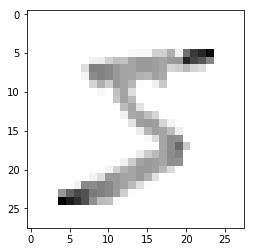

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)

plt.show()

In [4]:
# save a model
model.save('epic_num_reader.model')

In [5]:
# load the model to reuse
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [8]:
# make predictions using the model
predictions = new_model.predict([x_test])
print(predictions)

[[1.4118843e-09 7.8397600e-09 5.1863628e-07 ... 9.9999917e-01
  2.0502204e-09 2.4659409e-08]
 [2.0065684e-07 1.0994081e-03 9.9876034e-01 ... 1.5351478e-07
  1.4261891e-05 7.0342587e-10]
 [1.2966217e-06 9.9692398e-01 2.2344668e-05 ... 1.5493858e-03
  6.5728457e-04 8.6642458e-06]
 ...
 [1.4062890e-08 3.5443124e-06 1.7664538e-08 ... 6.4748211e-04
  4.1641702e-06 3.9458995e-05]
 [8.0425656e-07 2.4460453e-06 2.9490633e-07 ... 3.5156438e-04
  4.6012467e-01 2.1033898e-07]
 [3.8429389e-06 3.6357296e-08 4.1874677e-09 ... 3.2903799e-10
  7.7919844e-07 1.3212667e-09]]


Image predicted as 2


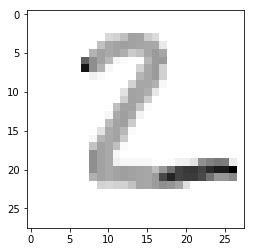

In [7]:
import numpy as np

# print prediction and verify the actual image
print('Image predicted as {}'.format(np.argmax(predictions[1])))

# actual image
plt.imshow(x_test[1], cmap = plt.cm.binary)
plt.show()